In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import warnings

plt.rcParams['font.family'] = 'Arial'
warnings.filterwarnings("ignore", category=UserWarning)

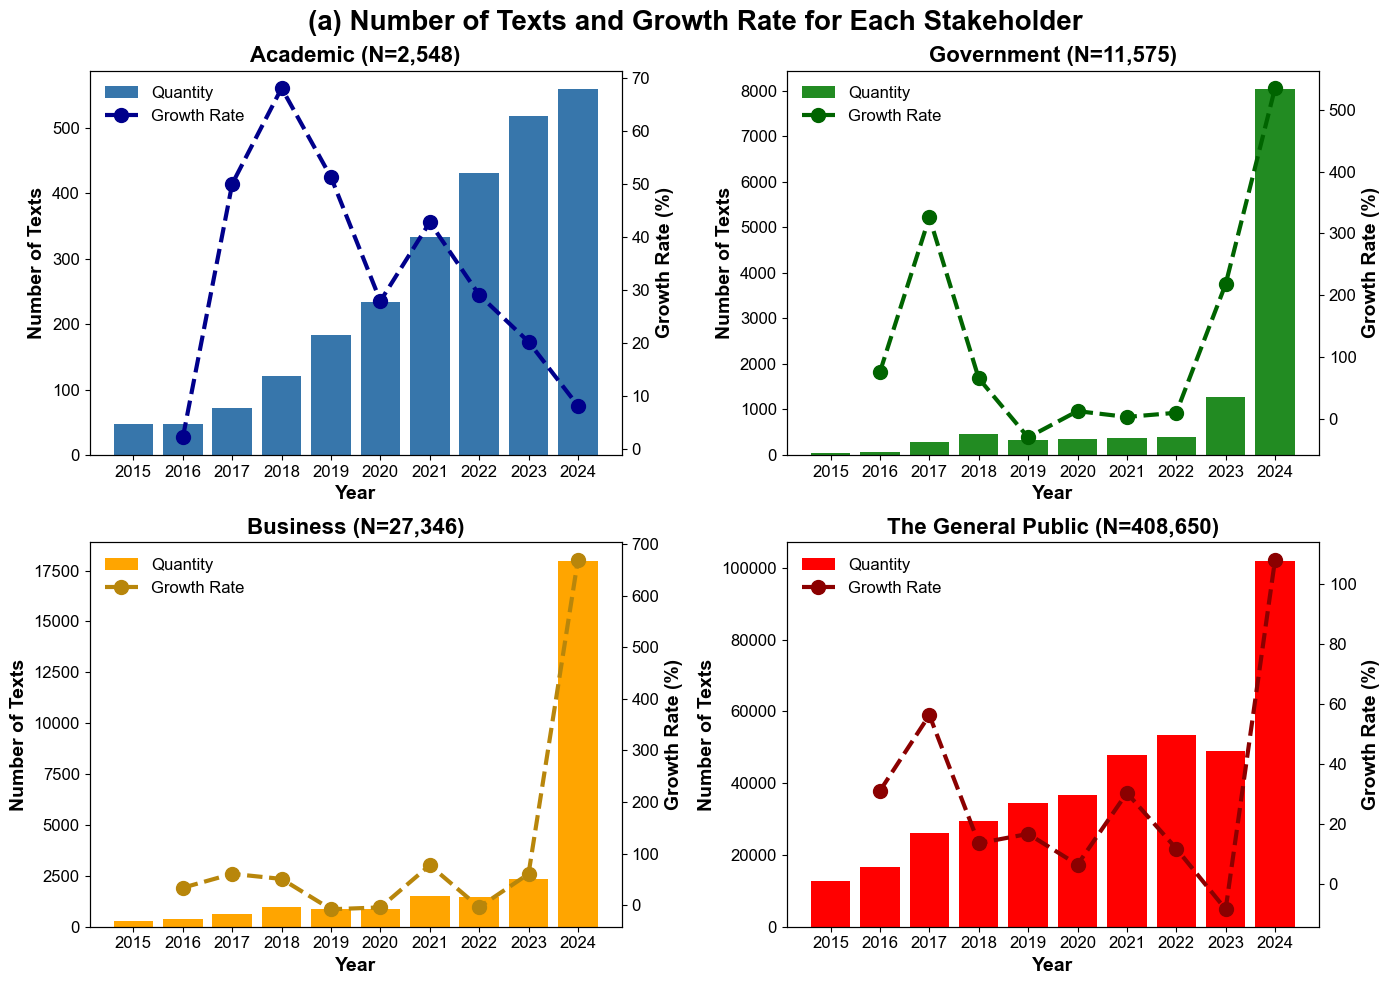

In [2]:
# Figure 1a

# Load the academic data CSV file
academic_file_path = r'C:\Users\justi\Downloads\UAM-TM\Fig_1a_academic.csv'
academic_data = pd.read_csv(academic_file_path)

# Load the social media data CSV file
social_media_file_path = r'C:\Users\justi\Downloads\UAM-TM\Fig_1a_social_media.csv'
social_media_data = pd.read_csv(social_media_file_path)

# Assuming there is a 'Year' column; group by year for academic data
academic_summary = academic_data.groupby('Year').size().reset_index(name='Academic')

# Merge social media data with academic summary
summary = pd.merge(social_media_data, academic_summary, on='Year', how='outer')

# Fill missing values in Academic column with 0 if any
summary['Academic'] = summary['Academic'].fillna(0)

# Calculate year-over-year percentage change (rate of change) for each stakeholder
for col in ['Academic', 'Government', 'Business', 'The General Public']:
    summary[f'{col}_growth_rate'] = summary[col].pct_change() * 100  # Convert to percentage

# Compute the total number of texts for each stakeholder
total_texts = {stakeholder: summary[stakeholder].sum() for stakeholder in ['Academic', 'Government', 'Business', 'The General Public']}

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
stakeholders = ['Academic', 'Government', 'Business', 'The General Public']
colors = ['#3776ab', 'forestgreen', 'orange', 'red']
dark_colors = ['darkblue', 'darkgreen', 'darkgoldenrod', 'darkred']  # Darker colors for lines

# Extract all years explicitly for x-axis ticks
years = summary['Year']

for i, ax in enumerate(axs.flat):
    stakeholder = stakeholders[i]
    bar_color = colors[i]
    line_color = dark_colors[i]
    
    # Bar chart for quantities
    bars = ax.bar(
        summary['Year'],
        summary[stakeholder],
        color=bar_color,
        width=0.8,
        label='Quantity',
    )
    
    # Line plot for growth rates (use a secondary y-axis)
    ax2 = ax.twinx()
    line, = ax2.plot(
        summary['Year'],
        summary[f'{stakeholder}_growth_rate'],
        color=line_color,
        linestyle='--',
        marker='o',
        linewidth=3,
        markersize=10,
        label='Growth Rate',
    )
    
    # Customize axes
    ax.set_title(
        f'{stakeholder} (N={int(total_texts[stakeholder]):,})',  # Add total texts to the title
        fontsize=16,
        fontweight='bold'
    )
    ax.set_xlabel('Year', fontsize=14, fontweight='bold')
    ax.set_ylabel('Number of Texts', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Growth Rate (%)', fontsize=14, fontweight='bold')
    ax.tick_params(axis='both', labelsize=12)
    ax2.tick_params(axis='both', labelsize=12)
    
    # Show all years explicitly on the x-axis
    ax.set_xticks(years)
    
    # Add a combined legend for both Quantity and Growth Rate
    ax.legend(
        [bars[0], line],
        ['Quantity', 'Growth Rate'],
        loc='upper left',
        fontsize=12,
        frameon=False,
    )

# Add a big title for the entire figure
fig.suptitle(
    '(a) Number of Texts and Growth Rate for Each Stakeholder',
    fontsize=20,
    fontweight='bold',
)

# Adjust layout
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig(r'C:\Users\justi\Downloads\UAM-TM\Fig_1a.png', dpi=300)

# Show the plot
plt.show()

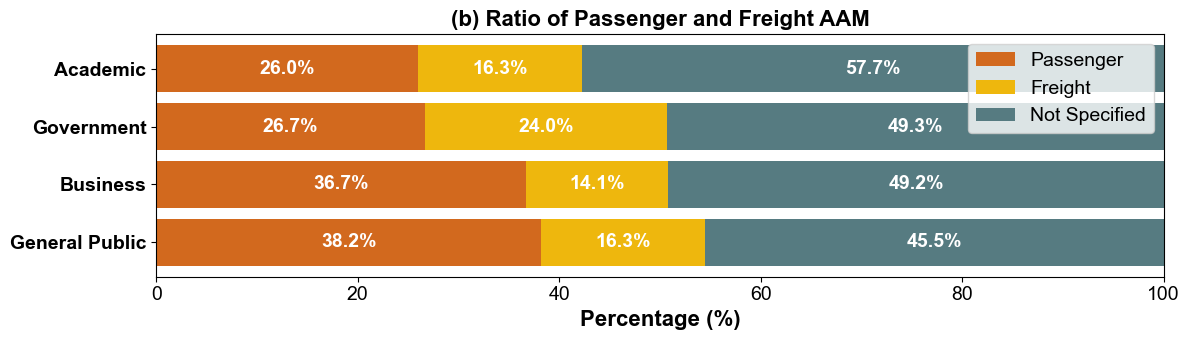

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# File path for the CSV file
input_file_path = r'C:\Users\justi\Downloads\UAM-TM\Fig_1b.csv'

# Read the data from the CSV file
data_df = pd.read_csv(input_file_path)

# Ensure numeric columns are properly converted
numeric_columns = ['Passenger', 'Freight', 'Not Specified']
data_df[numeric_columns] = data_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Extract categories and data
categories = data_df.iloc[:, 0].tolist()  # Assuming first column contains the category labels
data = {column: data_df[column].values for column in numeric_columns}

# Total for each category to normalize percentages
totals = np.array([sum(x) for x in zip(*data.values())])

# Convert raw counts to percentages
percent_data = {key: np.array(value) / totals * 100 for key, value in data.items()}

# Bar positions and height
y = np.arange(len(categories))
bar_height = 0.8

# Define colors for each label
colors = {
    'Passenger': 'chocolate',
    'Freight': '#eeb70d',
    'Not Specified': '#567b81'
}

# Plot
fig, ax = plt.subplots(figsize=(12, 3.5))

left = np.zeros(len(categories))

# Plot bars and add text annotations
for label, values in percent_data.items():
    bars = ax.barh(y, values, bar_height, label=label, left=left, color=colors[label])
    for i, (bar, percentage) in enumerate(zip(bars, values)):
        if percentage > 5:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                f"{percentage:.1f}%",
                ha="center", va="center", fontsize=14, color="white", weight="bold"
            )
    left += values

# Formatting
ax.set_yticks(y)
ax.set_yticklabels(categories, fontsize=16, fontweight='bold')
ax.set_xlabel('Percentage (%)', fontsize=16, fontweight='bold')
ax.set_title('(b) Ratio of Passenger and Freight AAM', fontsize=16, fontweight='bold')

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

ax.legend(loc='upper right', fontsize=14)
ax.set_xlim(0, 100)
plt.tight_layout()

# Save and show the plot
plt.savefig(r'C:\Users\justi\Downloads\UAM-TM\Fig_1b.png', dpi=300)
plt.show()

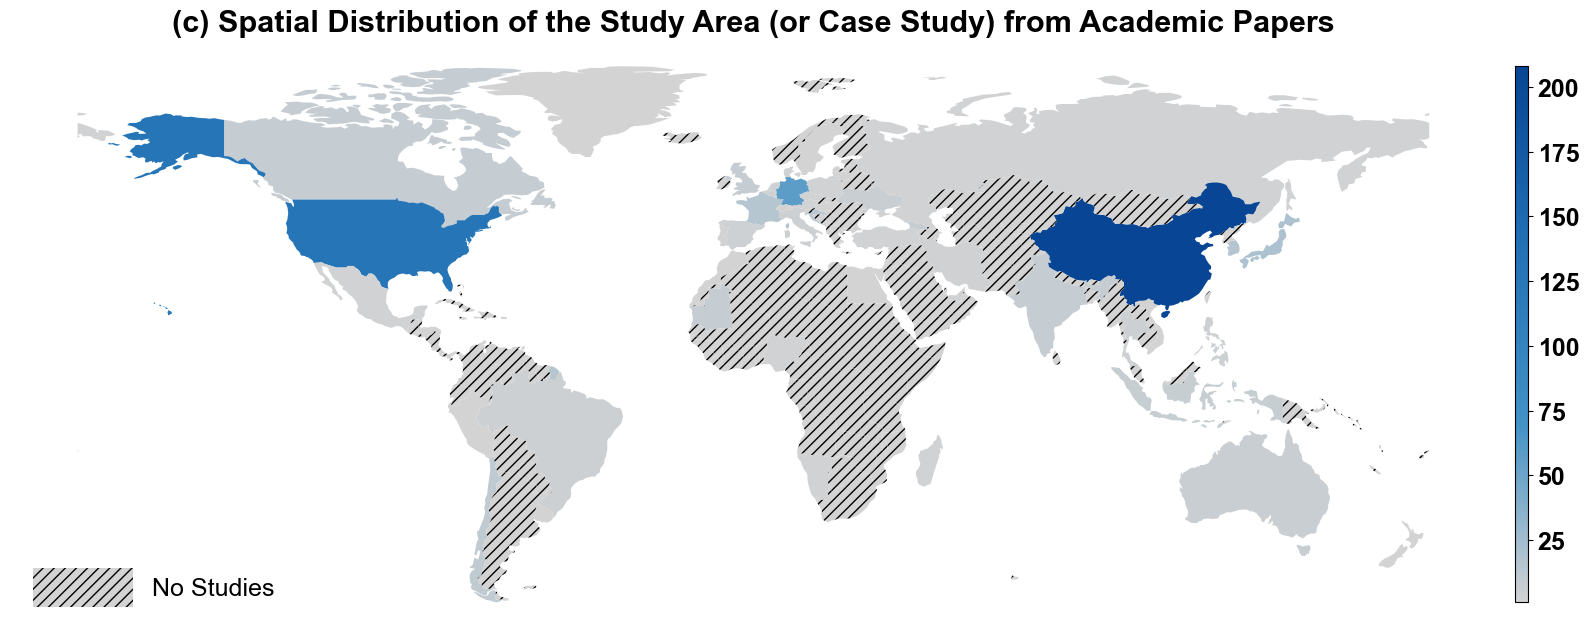

In [4]:
# Figure 1c

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
from matplotlib.font_manager import FontProperties
import matplotlib.patches as mpatches

# Load the world shapefile
world = gpd.read_file(r'C:\Users\justi\Downloads\UAM-TM\ne_110m_admin_0_countries.shp', engine='pyogrio')

# Load the study area CSV file
study_areas = pd.read_csv(r'C:\Users\justi\Downloads\UAM-TM\Fig_1c.csv')

# Count the number of studies per country
country_counts = study_areas['study_area'].value_counts().reset_index()
country_counts.columns = ['country', 'study_count']

# Merge with the world GeoDataFrame
merged = world.merge(country_counts, left_on='ADMIN', right_on='country', how='left')

# Remove Antarctica from the GeoDataFrame
merged = merged[merged['ADMIN'] != 'Antarctica']

# Define a custom blue-themed colormap
colors = ["lightgrey", "#4292c6", "#2171b5", "#084594"]  # Light to dark blue
cmap = LinearSegmentedColormap.from_list("blue_theme", colors)  # Create a custom colormap

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(18, 7))

# Set the background color of the map (sea) to black
ax.set_facecolor('black')

# Plot country boundaries excluding Antarctica
world[world['ADMIN'] != 'Antarctica'].boundary.plot(ax=ax, linewidth=0, color='maroon')

# Plot study areas with the custom blue colormap
im = merged.plot(column='study_count', ax=ax,
                 missing_kwds={
                     "color": "lightgrey",
                     "edgecolor": "none",
                     "hatch": "///",  # Updated hatch for better visibility
                     "label": "No Studies"
                 },
                 cmap=cmap,  # Use the custom blue colormap
                 edgecolor='none')  # Add borders to countries

# Remove axis ticks, labels, and the rectangle boundary
ax.set_axis_off()

# Create a color bar with the custom blue colormap
sm = ScalarMappable(norm=Normalize(vmin=merged['study_count'].min(), vmax=merged['study_count'].max()), cmap=cmap)
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', aspect=40, shrink=0.8, pad=0.01)  # Shrink and aspect adjusted

# Customize the font properties for the colorbar tick labels (bold and size 18)
font_properties = FontProperties(weight='bold', size=18)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(font_properties)

# Add a larger legend for "No Studies" in the bottom-left corner
no_data_patch = mpatches.Patch(facecolor="lightgrey", edgecolor="black", hatch="///", label="No Studies", linewidth=0)

legend = ax.legend(handles=[no_data_patch], loc='lower left', fontsize=18, frameon=False, handleheight=2, handlelength=4)

# Set title
plt.title('(c) Spatial Distribution of the Study Area (or Case Study) from Academic Papers', fontsize=22, fontweight='bold')

plt.tight_layout()

# Save the plot as a PNG file
plt.savefig(r'C:\Users\justi\Downloads\UAM-TM\Fig_1c.png', dpi=300)

# Show the plot
plt.show()

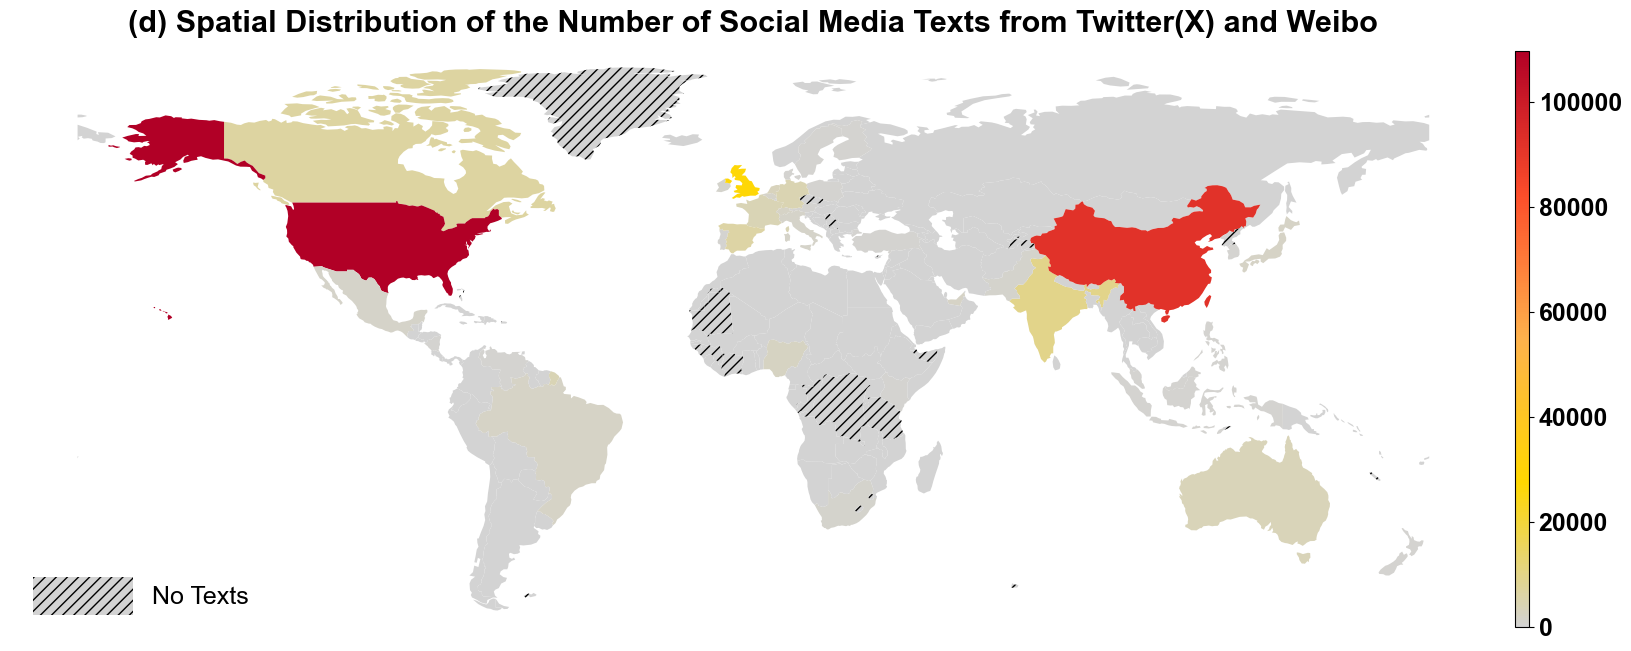

In [5]:
# Figure 1d

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
from matplotlib.font_manager import FontProperties
import matplotlib.patches as mpatches

# Load the world shapefile
world = gpd.read_file(r'C:\Users\justi\Downloads\UAM-TM\ne_110m_admin_0_countries.shp', engine='pyogrio')

# Load study area data from a CSV file
study_areas = pd.read_csv(r'C:\Users\justi\Downloads\UAM-TM\Fig_1de.csv')

# Merge with the world GeoDataFrame
merged = world.merge(study_areas, left_on='ADMIN', right_on='text_study_area', how='left')

# Remove Antarctica from the GeoDataFrame
merged = merged[merged['ADMIN'] != 'Antarctica']

# Define a custom colormap
colors = ["lightgrey", "gold", "#feb24c", "#fc4e2a", "#b10026"]  # Define more colors for higher values
cmap = LinearSegmentedColormap.from_list("custom", colors)

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(18, 7.5))

# Plot study areas without drawing country boundaries
im = merged.plot(column='text_study_count', ax=ax,
                 missing_kwds={
                     "color": "lightgrey",  # Color for missing data
                     "edgecolor": "none",  # No borders for countries with no data
                     "hatch": "///",  # Hatching for visual differentiation
                     "label": "No Texts"
                 },
                 cmap=cmap,  # Use the custom colormap
                 edgecolor='none')  # No borders for any countries

# Turn off the axis and remove the rectangle boundary
ax.axis('off')

# Create a color bar with a wider bar
sm = ScalarMappable(norm=Normalize(vmin=merged['text_study_count'].min(), vmax=merged['text_study_count'].max()), cmap=cmap)
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', aspect=40, shrink=0.8, pad=0.01)  # Increase aspect for a wider bar

# Customize the font properties for the colorbar tick labels (bold and size 18)
font_properties = FontProperties(weight='bold', size=18)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(font_properties)

# Add a larger legend for "No Texts" in the bottom-left corner
no_texts_patch = mpatches.Patch(facecolor="lightgrey", edgecolor="black", hatch="///", label="No Texts", linewidth=0)

legend = ax.legend(handles=[no_texts_patch], loc='lower left', fontsize=18, frameon=False, handleheight=2, handlelength=4)

# Set title
plt.title('(d) Spatial Distribution of the Number of Social Media Texts from Twitter(X) and Weibo', fontsize=22, fontweight='bold')

plt.tight_layout()

# Save the plot as a PNG file
plt.savefig(r'C:\Users\justi\Downloads\UAM-TM\Fig_1d.png', dpi=300)

# Show the plot
plt.show()

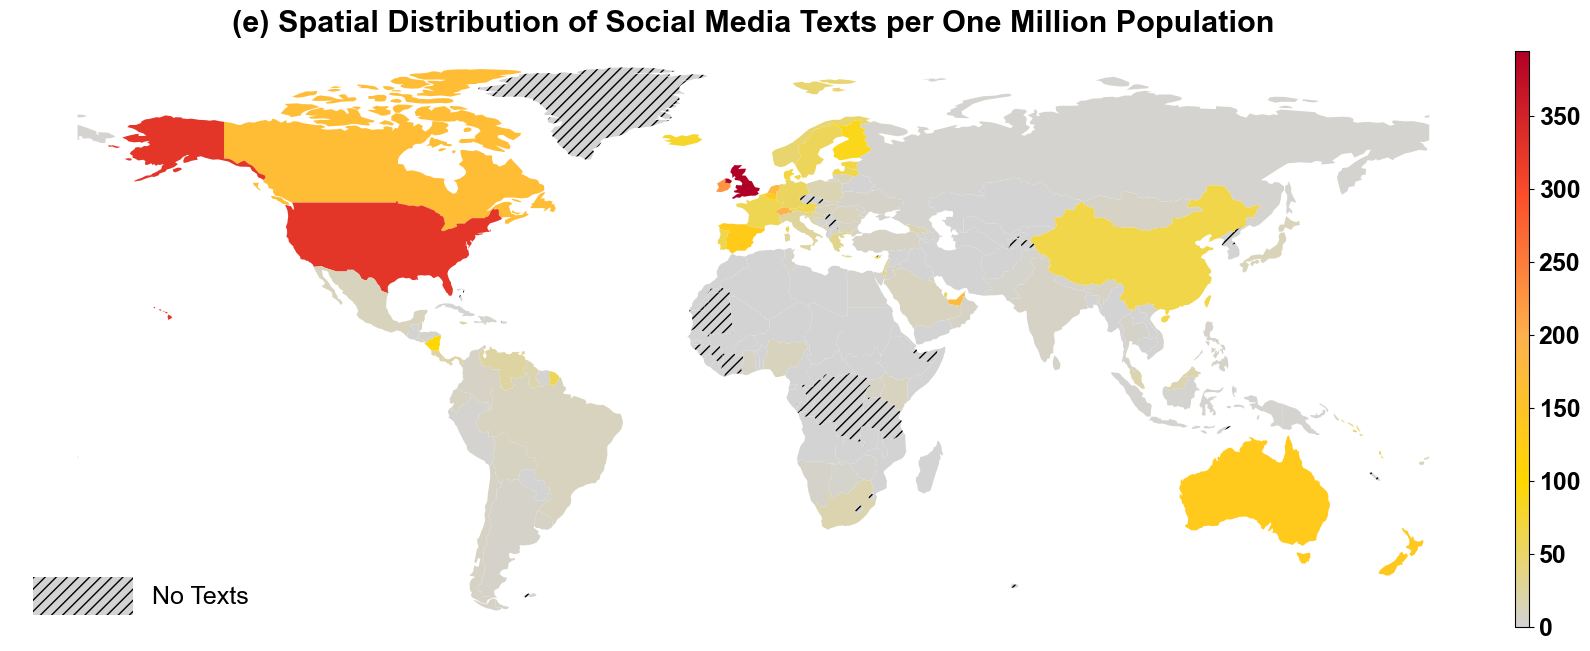

In [6]:
# Figure 1e

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
from matplotlib import rcParams

# Set font to Arial globally
rcParams['font.family'] = 'Arial'

# Load the world shapefile
world = gpd.read_file(r'C:\Users\justi\Downloads\UAM-TM\ne_110m_admin_0_countries.shp', engine='pyogrio')

# Load study area data from a CSV file
study_areas = pd.read_csv(r'C:\Users\justi\Downloads\UAM-TM\Fig_1de.csv')

# Merge with the world GeoDataFrame
merged = world.merge(study_areas, left_on='ADMIN', right_on='text_study_area', how='left')

# Remove Antarctica from the GeoDataFrame
merged = merged[merged['ADMIN'] != 'Antarctica']

# Define a custom colormap
colors = ["lightgrey", "gold", "#feb24c", "#fc4e2a", "#b10026"]  # Define more colors for higher values
cmap = LinearSegmentedColormap.from_list("custom", colors)

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(18, 7.5))

# Plot study areas without drawing country boundaries
im = merged.plot(column='text_per_population', ax=ax,
                 missing_kwds={
                     "color": "lightgrey",  # Color for missing data
                     "edgecolor": "none",  # No borders for countries with no data
                     "hatch": "///",  # Hatching for visual differentiation
                     "label": "No Studies"
                 },
                 cmap=cmap,  # Use the custom colormap
                 edgecolor='none')  # No borders for any countries

# Turn off the axis completely
ax.axis('off')

# Create a color bar
sm = ScalarMappable(norm=Normalize(vmin=merged['text_per_population'].min(), vmax=merged['text_per_population'].max()), cmap=cmap)
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', aspect=40, shrink=0.8, pad=0.01)  # Adjust aspect to make it wider
# Increase the font size of the colorbar numbers

# Customize the font properties for the colorbar tick labels (bold and size 18)
font_properties = FontProperties(weight='bold', size=18)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(font_properties)

# Add a larger legend for "No Texts" in the bottom-left corner
no_texts_patch = mpatches.Patch(facecolor="lightgrey", edgecolor="black", hatch="///", label="No Texts", linewidth=0)

legend = ax.legend(handles=[no_texts_patch], loc='lower left', fontsize=18, frameon=False, handleheight=2, handlelength=4)    
    
# Set title
plt.title('(e) Spatial Distribution of Social Media Texts per One Million Population', fontsize=22, fontweight='bold')

plt.tight_layout()

# Save the plot as a PNG file
plt.savefig(r'C:\Users\justi\Downloads\UAM-TM\Fig_1e.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

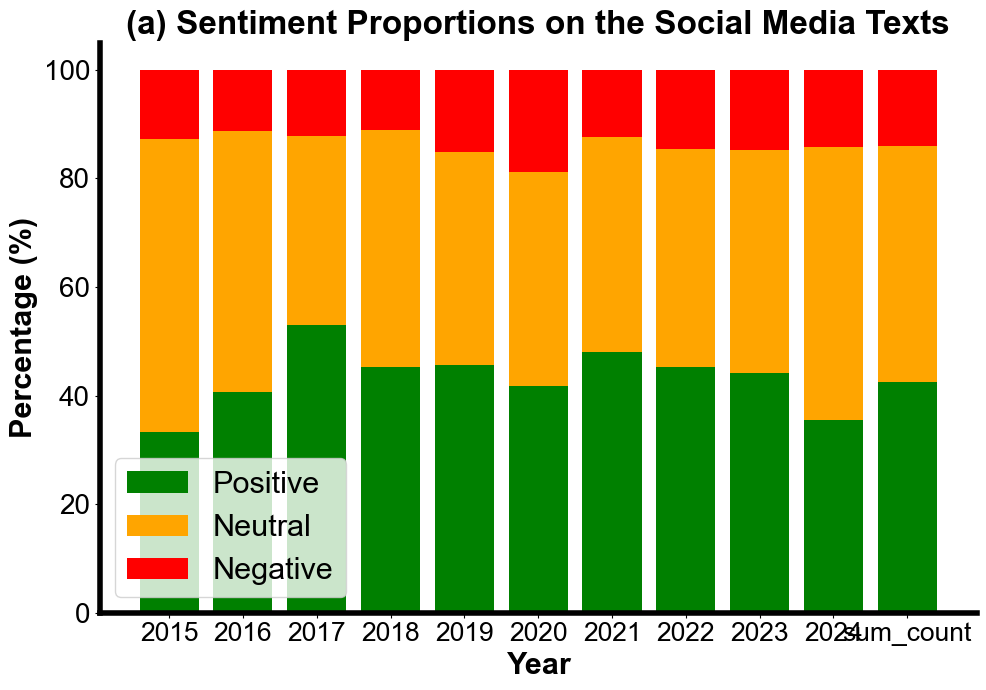

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data from CSV file
file_path = r'C:\Users\justi\Downloads\UAM-TM\Fig_2a.csv'
data = pd.read_csv(file_path)

# Extract data from the DataFrame
years = data['Year']
negative = data['Negative']
neutral = data['Neutral']
positive = data['Positive']

# Normalize values to get percentages (100% stacked bar chart)
total = negative + neutral + positive
negative_percent = negative / total * 100
neutral_percent = neutral / total * 100
positive_percent = positive / total * 100

# Plot the 100% stacked bar chart
plt.figure(figsize=(10, 7))

# Plot stacked bars
plt.bar(years, positive_percent, label='Positive', color='green')  # Positive sentiment
plt.bar(years, neutral_percent, bottom=positive_percent, label='Neutral', color='orange')  # Neutral sentiment
plt.bar(years, negative_percent, bottom=positive_percent + neutral_percent, label='Negative', color='red')  # Negative sentiment

# Add titles and labels
plt.title('(a) Sentiment Proportions on the Social Media Texts', fontsize=24, fontweight='bold')
plt.xlabel('Year', fontsize=22, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=22, fontweight='bold')

# Add x-axis ticks and labels
plt.xticks(years, fontsize=19)
plt.yticks(fontsize=20)

# Add a legend
plt.legend(fontsize=22)

# Remove the top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(4)
ax.spines['left'].set_color('black')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig(r'C:\Users\justi\Downloads\UAM-TM\Fig_2a.png', dpi=300)
plt.show()

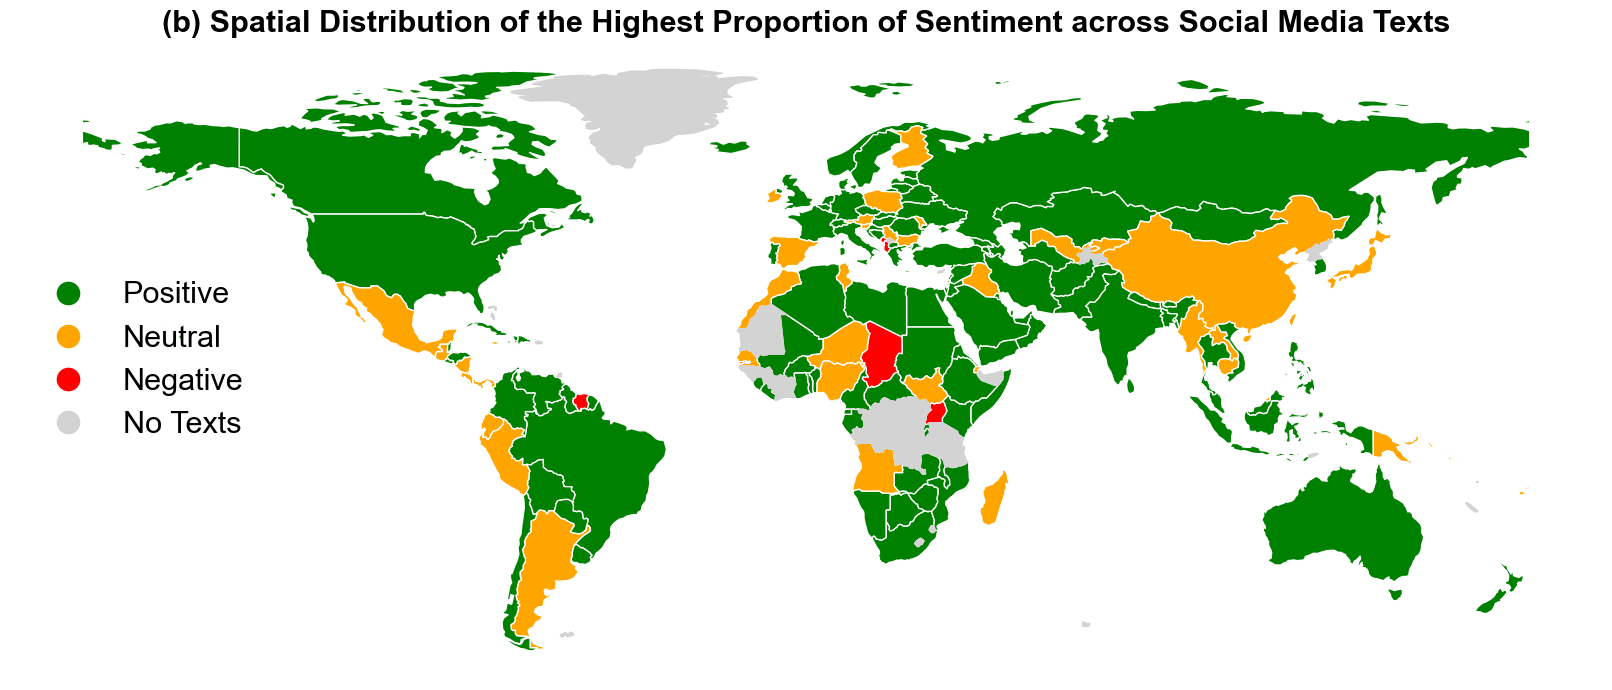

In [9]:
# Figure 2b

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the world shapefile
world = gpd.read_file(r'C:\Users\justi\Downloads\UAM-TM\ne_110m_admin_0_countries.shp', engine='pyogrio')

# Load the sentiment dataset
sentiment_data = pd.read_csv(r'C:\Users\justi\Downloads\UAM-TM\Fig_2b.csv')

# Select relevant columns
sentiment_data = sentiment_data[['country', 'max_ratio_sentiment']]

# Map sentiment categories to numeric values
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
sentiment_data['sentiment_numeric'] = sentiment_data['max_ratio_sentiment'].map(sentiment_mapping)

# Merge the sentiment data with the world GeoDataFrame
merged = world.merge(sentiment_data, left_on='ADMIN', right_on='country', how='left')

# Remove Antarctica for better visualization
merged = merged[merged['ADMIN'] != 'Antarctica']

# Define a custom colormap for sentiments
colors = ['red', 'orange', 'green']  # 'negative' = red, 'neutral' = orange, 'positive' = green
cmap = ListedColormap(colors)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(18, 7))

# Plot the sentiment data
im = merged.plot(
    column='sentiment_numeric',  # Use the numeric sentiment column for proper mapping
    ax=ax,
    missing_kwds={
        "color": "lightgrey",   # Color for countries with no data
        "edgecolor": "lightgrey",   # Ensure "No Data" regions also have black boundaries
        "hatch": "///",         # Hatch pattern for missing data
        "label": "No Data"
    },
    cmap=cmap,                   # Use the custom sentiment colormap
    edgecolor='white',           # Black boundary for countries
    linewidth=1,                 # Boundary width of 2 units
    categorical=True             # Handle the data as categorical
)

# Remove axis ticks, labels, and the rectangle boundary
ax.set_axis_off()

# Create a custom legend for the sentiments
legend_labels = ['Positive', 'Neutral', 'Negative', 'No Texts']
legend_colors = ['green', 'orange', 'red', 'lightgrey']  # Add lightgrey for No Texts
for label, color in zip(legend_labels, legend_colors):
    ax.plot([], [], color=color, marker='o', markersize=16, linestyle='', label=label)
ax.legend(loc='center left', fontsize=22, frameon=False, facecolor='white')

# Set the title
plt.title('(b) Spatial Distribution of the Highest Proportion of Sentiment across Social Media Texts', fontsize=22, fontweight='bold')

# Adjust layout to ensure the map fits well
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig(r'C:\Users\justi\Downloads\UAM-TM\Fig_2b.png', dpi=300)

# Show the plot
plt.show()

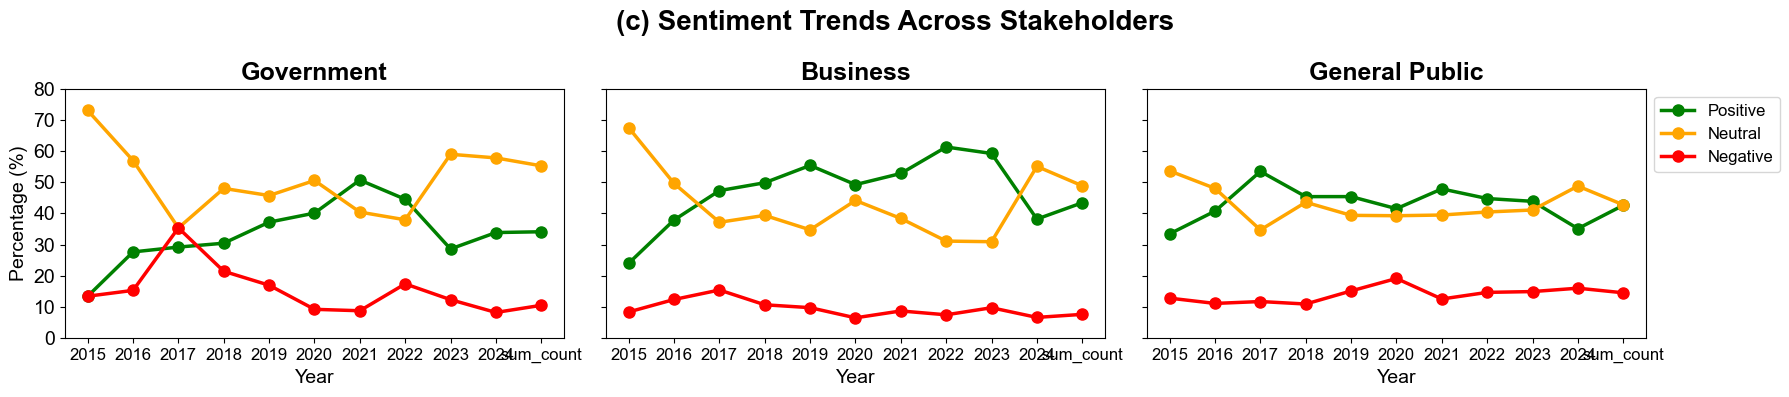

In [10]:
# Figure 2c
import pandas as pd
import matplotlib.pyplot as plt

# File paths for each stakeholder
file_path_business = r'C:\Users\justi\Downloads\UAM-TM\Fig_2c_business.csv'
file_path_government = r'C:\Users\justi\Downloads\UAM-TM\Fig_2c_government.csv'
file_path_public = r'C:\Users\justi\Downloads\UAM-TM\Fig_2c_public.csv'

# Load data for each stakeholder
data_business = pd.read_csv(file_path_business)
data_government = pd.read_csv(file_path_government)
data_public = pd.read_csv(file_path_public)

# Function to calculate sentiment percentages
def calculate_percentages(data):
    total = data['Negative'] + data['Neutral'] + data['Positive']
    negative_percent = data['Negative'] / total * 100
    neutral_percent = data['Neutral'] / total * 100
    positive_percent = data['Positive'] / total * 100
    return negative_percent, neutral_percent, positive_percent

# Calculate percentages for each stakeholder
negative_business, neutral_business, positive_business = calculate_percentages(data_business)
negative_government, neutral_government, positive_government = calculate_percentages(data_government)
negative_public, neutral_public, positive_public = calculate_percentages(data_public)

# Extract years
years = data_business['Year']  # Assuming all files have the same years

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharey=True)  # Share y-axis across subplots

# Line and marker customization
line_width = 2.5  # Thicker lines
marker_size = 8   # Bigger markers

# Set y-axis range and ticks
y_min, y_max = 0, 80  # Define the y-axis range
y_ticks = range(y_min, y_max + 10, 10)  # Define y-axis ticks (0, 10, 20, ..., 80)

# Government subplot (left)
axs[0].plot(years, positive_government, label='Positive', color='green', marker='o', linewidth=line_width, markersize=marker_size)
axs[0].plot(years, neutral_government, label='Neutral', color='orange', marker='o', linewidth=line_width, markersize=marker_size)
axs[0].plot(years, negative_government, label='Negative', color='red', marker='o', linewidth=line_width, markersize=marker_size)
axs[0].set_title('Government', fontsize=18, fontweight='bold')
axs[0].set_ylabel('Percentage (%)', fontsize=14)
axs[0].set_xlabel('Year', fontsize=14)
axs[0].tick_params(axis='both', labelsize=14)
axs[0].set_xticks(years)  # Explicitly set x-axis ticks for years
axs[0].set_xticklabels(years, fontsize=12)  # Set year labels
axs[0].set_yticks(y_ticks)  # Set y-axis ticks
axs[0].set_ylim([y_min, y_max])  # Set y-axis range

# Business subplot (middle)
axs[1].plot(years, positive_business, label='Positive', color='green', marker='o', linewidth=line_width, markersize=marker_size)
axs[1].plot(years, neutral_business, label='Neutral', color='orange', marker='o', linewidth=line_width, markersize=marker_size)
axs[1].plot(years, negative_business, label='Negative', color='red', marker='o', linewidth=line_width, markersize=marker_size)
axs[1].set_title('Business', fontsize=18, fontweight='bold')
axs[1].set_xlabel('Year', fontsize=14)
axs[1].tick_params(axis='both', labelsize=14)
axs[1].set_xticks(years)  # Explicitly set x-axis ticks for years
axs[1].set_xticklabels(years, fontsize=12)  # Set year labels
axs[1].set_yticks(y_ticks)  # Explicitly show y-axis ticks (shared y-axis)
axs[1].set_ylim([y_min, y_max])  # Set y-axis range

# General public subplot (right)
axs[2].plot(years, positive_public, label='Positive', color='green', marker='o', linewidth=line_width, markersize=marker_size)
axs[2].plot(years, neutral_public, label='Neutral', color='orange', marker='o', linewidth=line_width, markersize=marker_size)
axs[2].plot(years, negative_public, label='Negative', color='red', marker='o', linewidth=line_width, markersize=marker_size)
axs[2].set_title('General Public', fontsize=18, fontweight='bold')
axs[2].set_xlabel('Year', fontsize=14)
axs[2].tick_params(axis='both', labelsize=14)
axs[2].set_xticks(years)  # Explicitly set x-axis ticks for years
axs[2].set_xticklabels(years, fontsize=12)  # Set year labels
axs[2].set_yticks(y_ticks)  # Explicitly show y-axis ticks (shared y-axis)
axs[2].set_ylim([y_min, y_max])  # Set y-axis range

# Add legend to the last subplot (General Public), positioned outside the plot
axs[2].legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

# Global adjustments
plt.suptitle('(c) Sentiment Trends Across Stakeholders', fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.99])  # Adjust layout to make space for the title and legend

# Save the figure
plt.savefig(r'C:\Users\justi\Downloads\UAM-TM\Fig_2c.png', dpi=300)
plt.show()

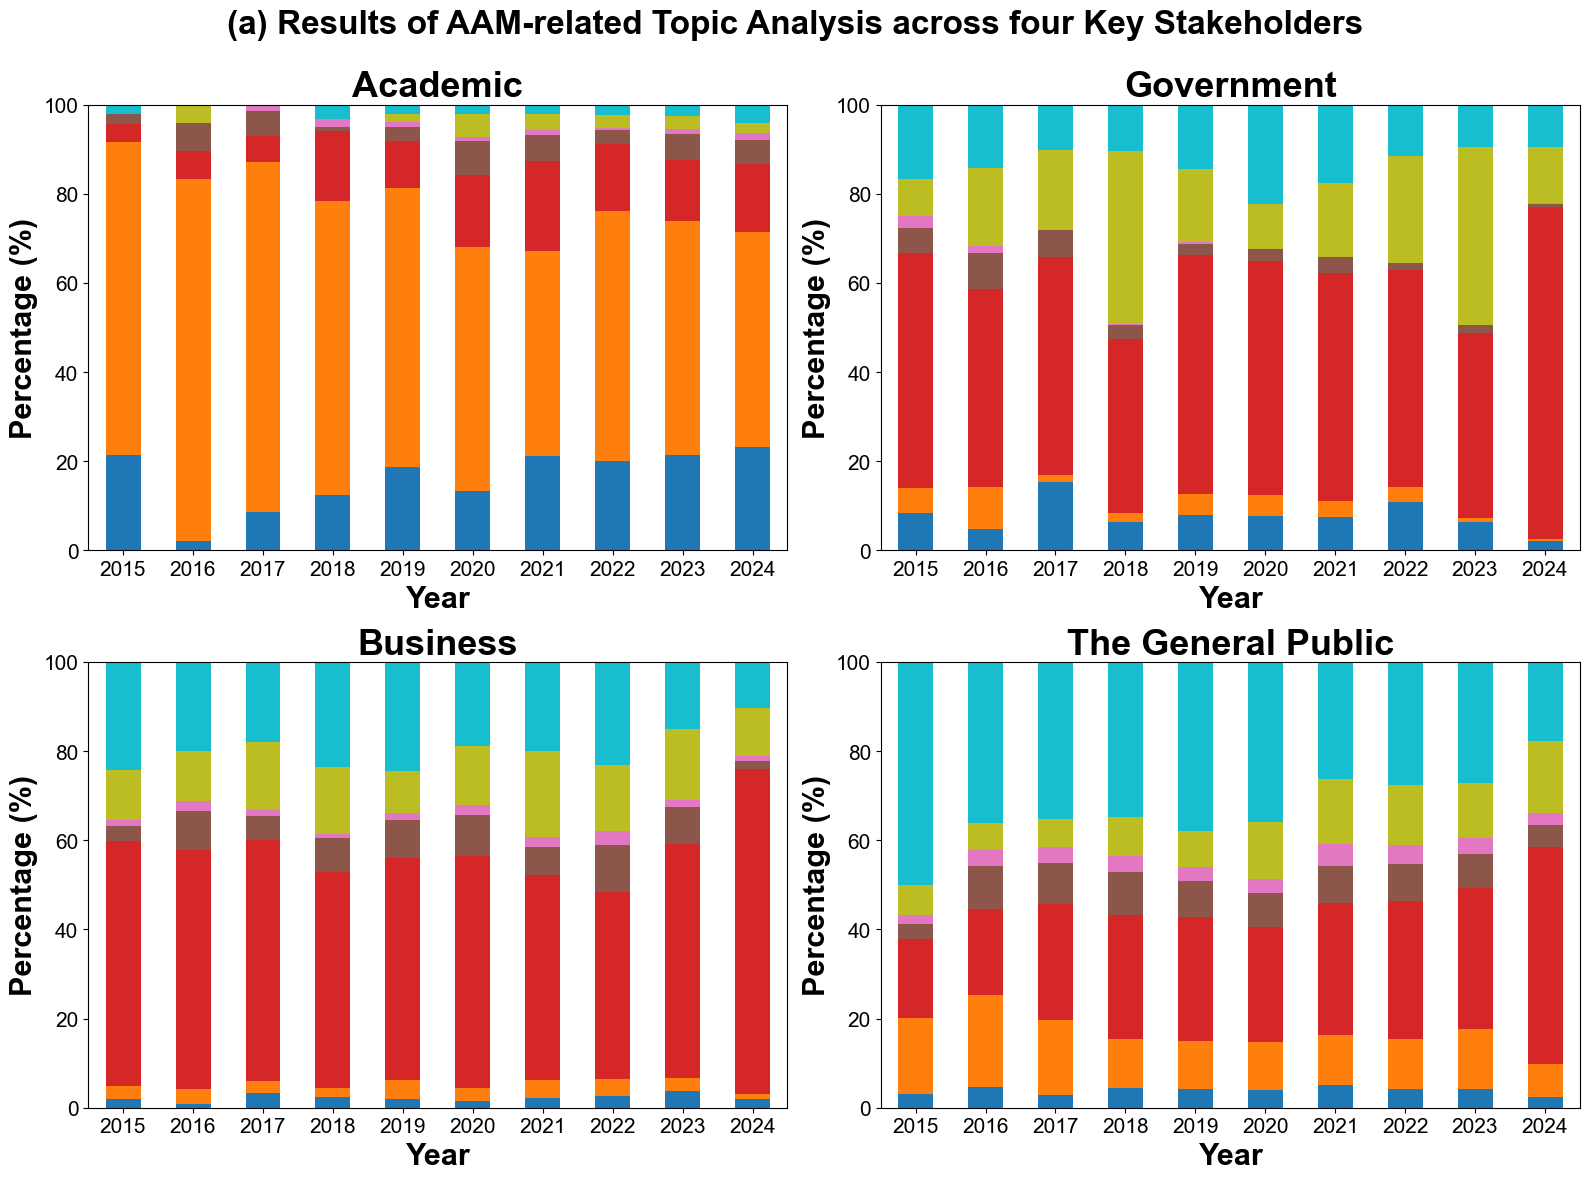

In [11]:
# Figure 3a

import pandas as pd
import matplotlib.pyplot as plt

# Function to plot a 100% stacked bar chart
def plot_percentage_stacked_bar(data, title, ax):
    # Calculate proportions for 100% stacked bar chart
    data_percentage = data.div(data.sum(axis=1), axis=0) * 100
    
    # Plotting
    data_percentage.plot(kind='bar', stacked=True, colormap='tab10', ax=ax)
    ax.set_title(title, fontsize=26, fontweight='bold')  # Title for each subplot
    ax.set_xlabel('Year', fontsize=22, fontweight='bold')
    ax.set_ylabel('Percentage (%)', fontsize=22, fontweight='bold')
    ax.set_ylim(0, 100)  # Set y-axis limits from 0 to 100%
    ax.tick_params(axis='x', rotation=0, labelsize=15)  # Set x-axis tick label size
    ax.tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

# Academic Data Processing
academic_file_path = r'C:\Users\justi\Downloads\UAM-TM\Fig_3a_academic.csv'
academic_data = pd.read_csv(academic_file_path)

# Define a mapping for result types
result_mapping = {
    '1': 'Safety',
    '2': 'Aerodynamics',
    '3': 'Integration and Infrastructure',
    '4': 'Automation',
    '5': 'Price and Cost',
    '6': 'Air Transport Policy',
    '7': 'User Experience'
}

# Filter out irrelevant results and map the results
filtered_academic_data = academic_data[academic_data['result'].astype(str).isin(result_mapping.keys())].copy()
filtered_academic_data.loc[:, 'result'] = filtered_academic_data['result'].astype(str).map(result_mapping)  # Use .loc

# Group by year and result type
academic_summary = filtered_academic_data.groupby(['Year', 'result']).size().reset_index(name='Count')
academic_summary = academic_summary.pivot(index='Year', columns='result', values='Count').fillna(0)

# Reorder the columns to match the defined types
academic_summary = academic_summary[['Safety', 'Aerodynamics', 
                                      'Integration and Infrastructure', 
                                      'Automation', 'Price and Cost', 
                                      'Air Transport Policy', 
                                      'User Experience']]

# Calculate proportions for 100% stacked bar chart
academic_percentage = academic_summary.div(academic_summary.sum(axis=1), axis=0) * 100

# Government Data Processing
government_file_path = r'C:\Users\justi\Downloads\UAM-TM\Fig_3b_topic_government.csv'
government_data = pd.read_csv(government_file_path, index_col='Year')

# Calculate proportions for government data
government_percentage = government_data.div(government_data.sum(axis=1), axis=0) * 100

# Business Data Processing
business_file_path = r'C:\Users\justi\Downloads\UAM-TM\Fig_3b_topic_business.csv'
business_data = pd.read_csv(business_file_path, index_col='Year')

# Calculate proportions for business data
business_percentage = business_data.div(business_data.sum(axis=1), axis=0) * 100

# General Public Data Processing
public_file_path = r'C:\Users\justi\Downloads\UAM-TM\Fig_3b_topic_public.csv'
public_data = pd.read_csv(public_file_path, index_col='Year')

# Calculate proportions for public data
public_percentage = public_data.div(public_data.sum(axis=1), axis=0) * 100

# Create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.8)

# Plot each stakeholder's data in a subplot
plot_percentage_stacked_bar(academic_percentage, 'Academic', axs[0, 0])
plot_percentage_stacked_bar(government_percentage, 'Government', axs[0, 1])
plot_percentage_stacked_bar(business_percentage, 'Business', axs[1, 0])
plot_percentage_stacked_bar(public_percentage, 'The General Public', axs[1, 1])

fig.suptitle('(a) Results of AAM-related Topic Analysis across four Key Stakeholders', fontsize=24, fontweight='bold')

# Remove legends from all subplots (if any were created)
for ax in axs.flat:
    ax.legend().set_visible(False)  # Ensure no legend is displayed

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig(r'C:\Users\justi\Downloads\UAM-TM\Fig_3a.png', dpi=300)

# Show the plot
plt.show()

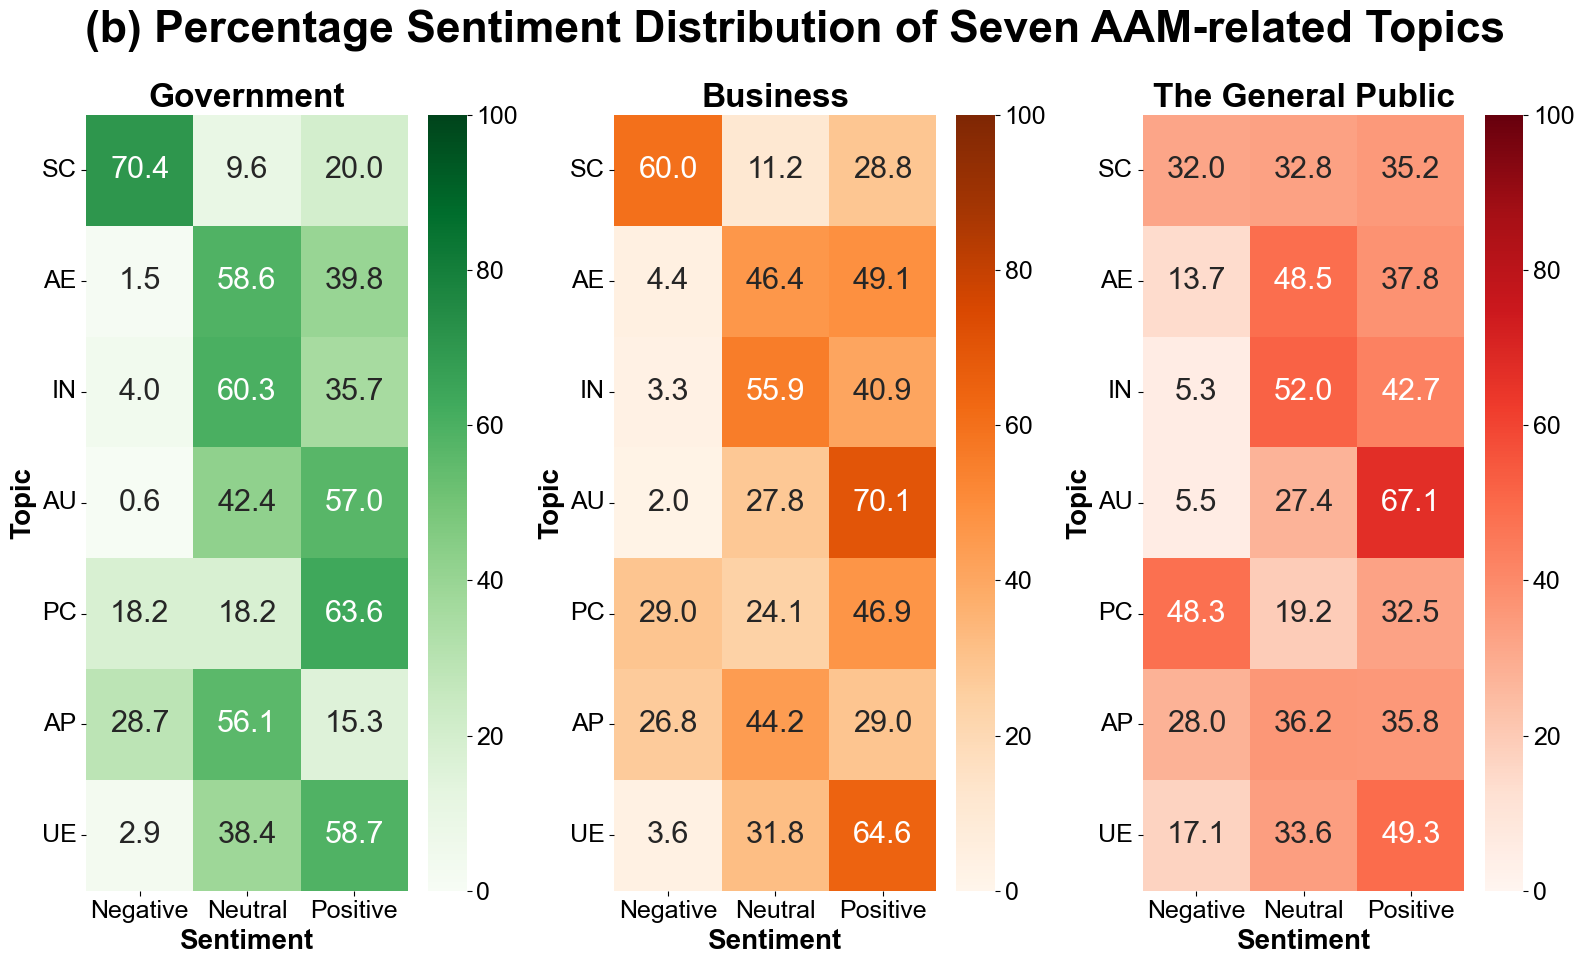

In [12]:
# Figure 3b

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import rcParams

rcParams['font.family'] = 'Arial'

general_public = pd.read_csv(r'C:\Users\justi\Downloads\UAM-TM\Fig_3c_sentiment_topic_public.csv', index_col='Sentiment')
government = pd.read_csv(r'C:\Users\justi\Downloads\UAM-TM\Fig_3c_sentiment_topic_government.csv', index_col='Sentiment')
business = pd.read_csv(r'C:\Users\justi\Downloads\UAM-TM\Fig_3c_sentiment_topic_business.csv', index_col='Sentiment')

# List of categories
categories = ['SC', 'AE', 'IN', 'AU', 'PC', 'AP', 'UE']

def normalize_to_percentage(df):
    return df.div(df.sum(axis=0), axis=1) * 100

general_public_percentage = normalize_to_percentage(general_public)
government_percentage = normalize_to_percentage(government)
business_percentage = normalize_to_percentage(business)

# Transpose data for heatmaps
general_public_percentage = general_public_percentage.T
government_percentage = government_percentage.T
business_percentage = business_percentage.T

# Plotting heatmaps
fig, axs = plt.subplots(1, 3, figsize=(16, 10)) 

# Function to create heatmaps with larger color bar labels
def create_heatmap(data, ax, title, cmap):
    heatmap = sns.heatmap(
        data, 
        annot=True, 
        fmt='.1f', 
        cmap=cmap, 
        cbar=True, 
        vmin=0, vmax=100,  # Ensure heatmap ranges from 0% to 100%
        annot_kws={"size": 22},
        ax=ax,
        xticklabels=['Negative', 'Neutral', 'Positive'], 
        yticklabels=categories 
    )
    
    heatmap.set_title(title, fontsize=24, fontweight='bold')
    heatmap.tick_params(axis='y', labelsize=18, rotation=0)
    heatmap.set_xticks([0.5, 1.5, 2.5])
    heatmap.set_xticklabels(['Negative', 'Neutral', 'Positive'], fontsize=18) 
    heatmap.set_ylabel('Topic', fontsize=20, fontweight='bold')
    heatmap.set_xlabel('Sentiment', fontsize=20, fontweight='bold') 
    cbar = heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize=18) 

create_heatmap(government_percentage, axs[0], 'Government', 'Greens')
create_heatmap(business_percentage, axs[1], 'Business', 'Oranges')
create_heatmap(general_public_percentage, axs[2], 'The General Public', 'Reds')

# Global title and layout adjustments
fig.suptitle('(b) Percentage Sentiment Distribution of Seven AAM-related Topics', fontsize=32, fontweight='bold')
plt.tight_layout(rect=[0, 0.02, 1, 0.98])  # Leave space for the global title

# Save the figure as a high-resolution image
output_path = r'C:\Users\justi\Downloads\UAM-TM\Fig_3b.png'
plt.savefig(output_path, dpi=300)

# Show the plots
plt.show()

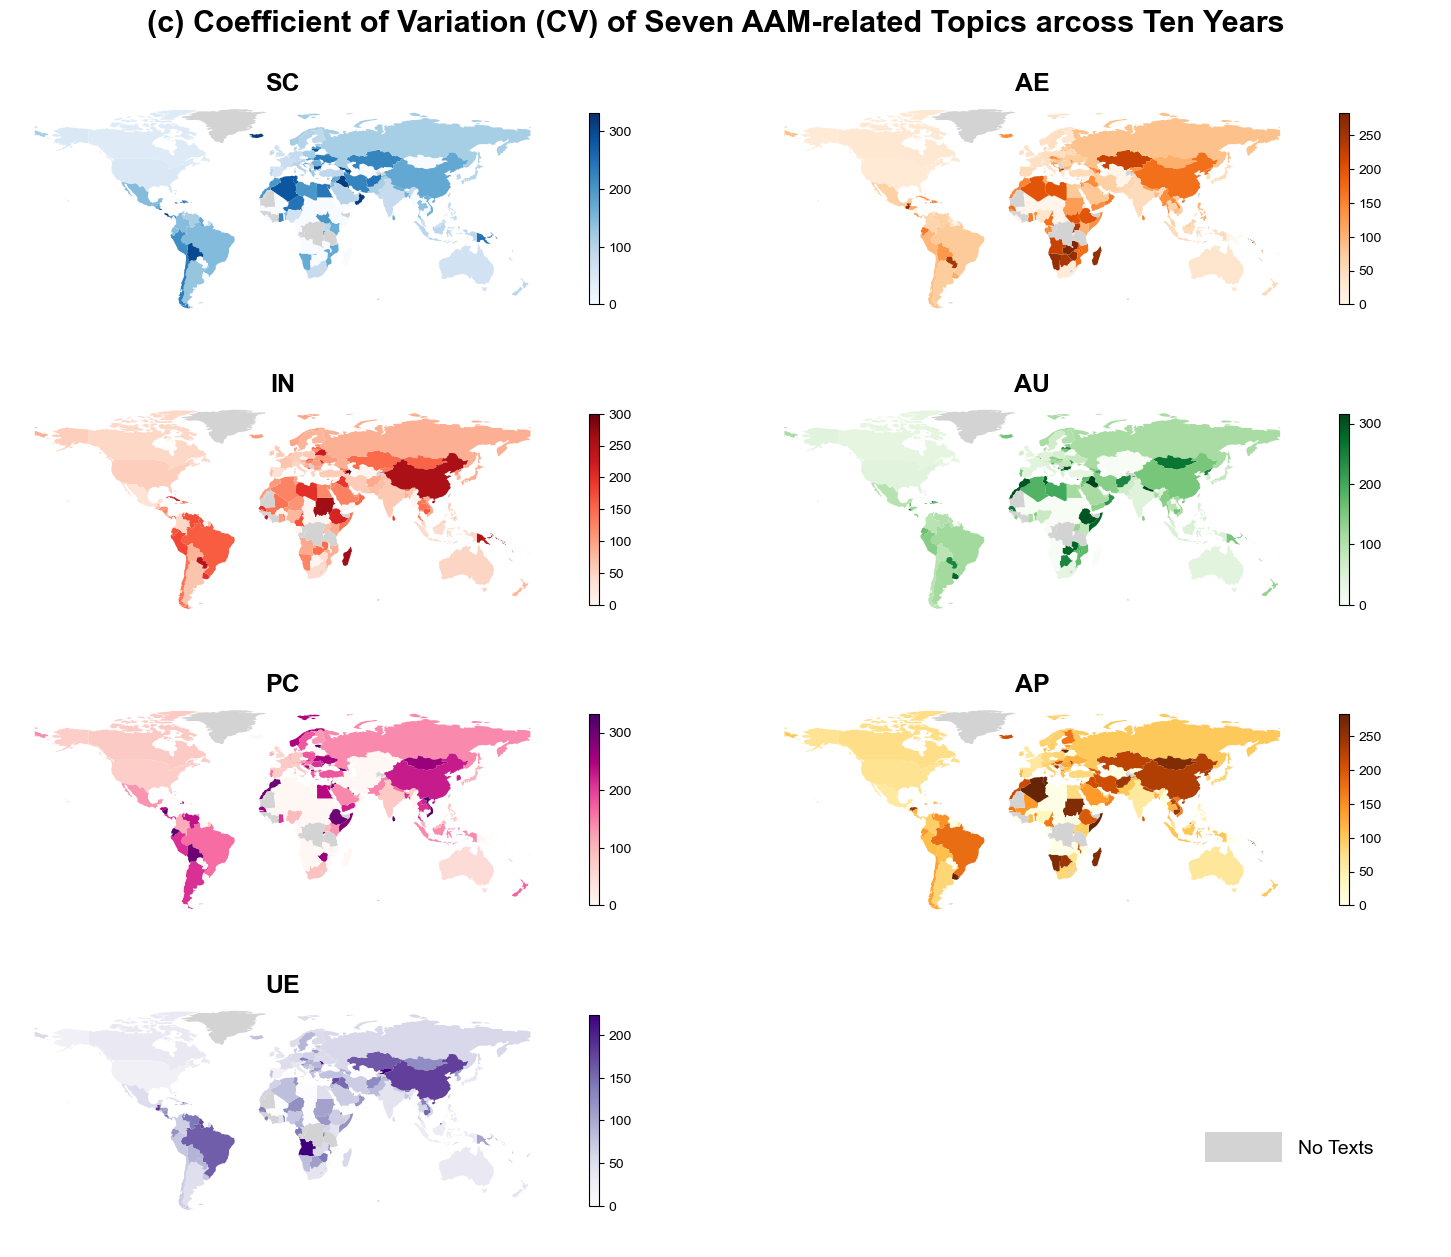

In [13]:
# Figure 3c

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.patches as mpatches

# Set the font globally to Arial
plt.rcParams['font.family'] = 'Arial'

# Load the dataset
file_path = r'C:\Users\justi\Downloads\UAM-TM\Fig_3de.csv'

try:
    data = pd.read_csv(file_path)
    
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Convert topic columns to numeric
topic_cols = [f"Topic {i}" for i in range(1, 8)]
data[topic_cols] = data[topic_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows where all topic columns are NaN
data.dropna(subset=topic_cols, how="all", inplace=True)

# Filter out countries and topics with fewer than 10 posts
filtered_data = data.copy()
for topic in topic_cols:
    filtered_data = filtered_data[filtered_data[topic] >= 0]

# Calculate CV for each country and each topic over time
cv_results = filtered_data.groupby('Nation').agg({
    'Year': 'count',  # Count the number of years for each country
    **{col: ['mean', 'std'] for col in topic_cols}
}).reset_index()

# Rename columns for clarity
cv_results.columns = ['Nation'] + ['Year_Count'] + [f'{col}_{stat}' for col in topic_cols for stat in ['mean', 'std']]

# Calculate CV for each topic in each country
for topic in range(1, 8):
    topic_col = f"Topic {topic}"
    cv_results[f'CV_{topic_col}'] = (cv_results[f'{topic_col}_std'] / cv_results[f'{topic_col}_mean']) * 100
    cv_results[f'CV_{topic_col}'] = cv_results[f'CV_{topic_col}'].replace([np.inf, -np.inf], 0)  # Handle division by zero
    cv_results[f'CV_{topic_col}'] = cv_results[f'CV_{topic_col}'].fillna(0)  # Fill NaN with 0

# Print CV values for each country and topic
for country in cv_results['Nation'].unique():
    for topic in range(1, 8):
        topic_col = f"Topic {topic}"
        cv_value = cv_results.loc[cv_results['Nation'] == country, f'CV_{topic_col}'].values[0]

# Topic names for better readability
categories = [
    'SC', 
    'AE', 
    'IN',  
    'AU', 
    'PC', 
    'AP', 
    'UE'
]

# Load the world shapefile
world = gpd.read_file(r'C:\Users\justi\Downloads\UAM-TM\ne_110m_admin_0_countries.shp', engine='pyogrio')

# Define color maps for each topic
color_maps = ['Blues', 'Oranges', 'Reds', 'Greens', 'RdPu', 'YlOrBr', 'Purples']
#Blues Oranges Greens YlOrBr
# Create a figure with 4x2 subplots (7 topics)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 13))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Add a big title to the entire figure
fig.suptitle("(c) Coefficient of Variation (CV) of Seven AAM-related Topics arcoss Ten Years", fontsize=22, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust layout to make space for the legend above the first subplot

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Iterate over each topic and create a subplot
for i in range(7):  # Only 7 topics
    topic_col = f"Topic {i+1}"  # Topic 1, Topic 2, ..., Topic 7
    cv_col = f'CV_{topic_col}'  # CV_Topic 1, CV_Topic 2, ..., CV_Topic 7
    topic_name = categories[i]  # Get the corresponding topic name

    # Merge the CV data with the world GeoDataFrame
    merged = world.merge(cv_results[['Nation', cv_col]], left_on='ADMIN', right_on='Nation', how='left')

    # Remove Antarctica for better visualization
    merged = merged[merged['ADMIN'] != 'Antarctica']

    # Plot the map
    im = merged.plot(
        column=cv_col,  # Use the CV column for mapping
        ax=axes[i],
        missing_kwds={
            "color": "lightgrey",   # Color for countries with no data
            "edgecolor": "lightgrey",   # Ensure "No Data" regions also have lightgrey boundaries
            "hatch": "///",         # Hatch pattern for missing data
            "label": "No Data"
        },
        cmap=color_maps[i],         # Use the corresponding color map
        edgecolor='black',           # Black boundary for countries
        linewidth=0,               # Boundary width of 0.5 units
        legend=True,                 # Add a legend
        legend_kwds={
            'shrink': 0.7,  # Make the legend longer
            'orientation': 'vertical',
          #  'label': 'CV'
        }
    )

    # Adjust the legend font size and remove the bounding box
    legend = axes[i].get_legend()
    if legend:
        legend.get_frame().set_linewidth(0)  # Remove the bounding box
        for text in legend.get_texts():
            text.set_fontsize(14)  # Increase the font size

    # Remove axis ticks, labels, and the rectangle boundary
    axes[i].set_axis_off()

    # Set the title for the subplot
    axes[i].set_title(f'{topic_name}', fontsize=18, fontweight='bold')

# Hide the last subplot (since we only have 7 topics)
axes[7].axis('off')

# Add a larger legend for "No Texts" in the bottom-right corner (just one)
no_texts_patch = mpatches.Patch(facecolor="lightgrey", edgecolor="black", hatch="", label="No Texts", linewidth=0)

legend = fig.legend(handles=[no_texts_patch], loc='lower right', bbox_to_anchor=(0.95, 0.08), fontsize=14, frameon=False, handleheight=2, handlelength=4)

# Save the plots as an image
plt.savefig("Fig_3c.png", dpi=300, bbox_inches="tight")
plt.show()

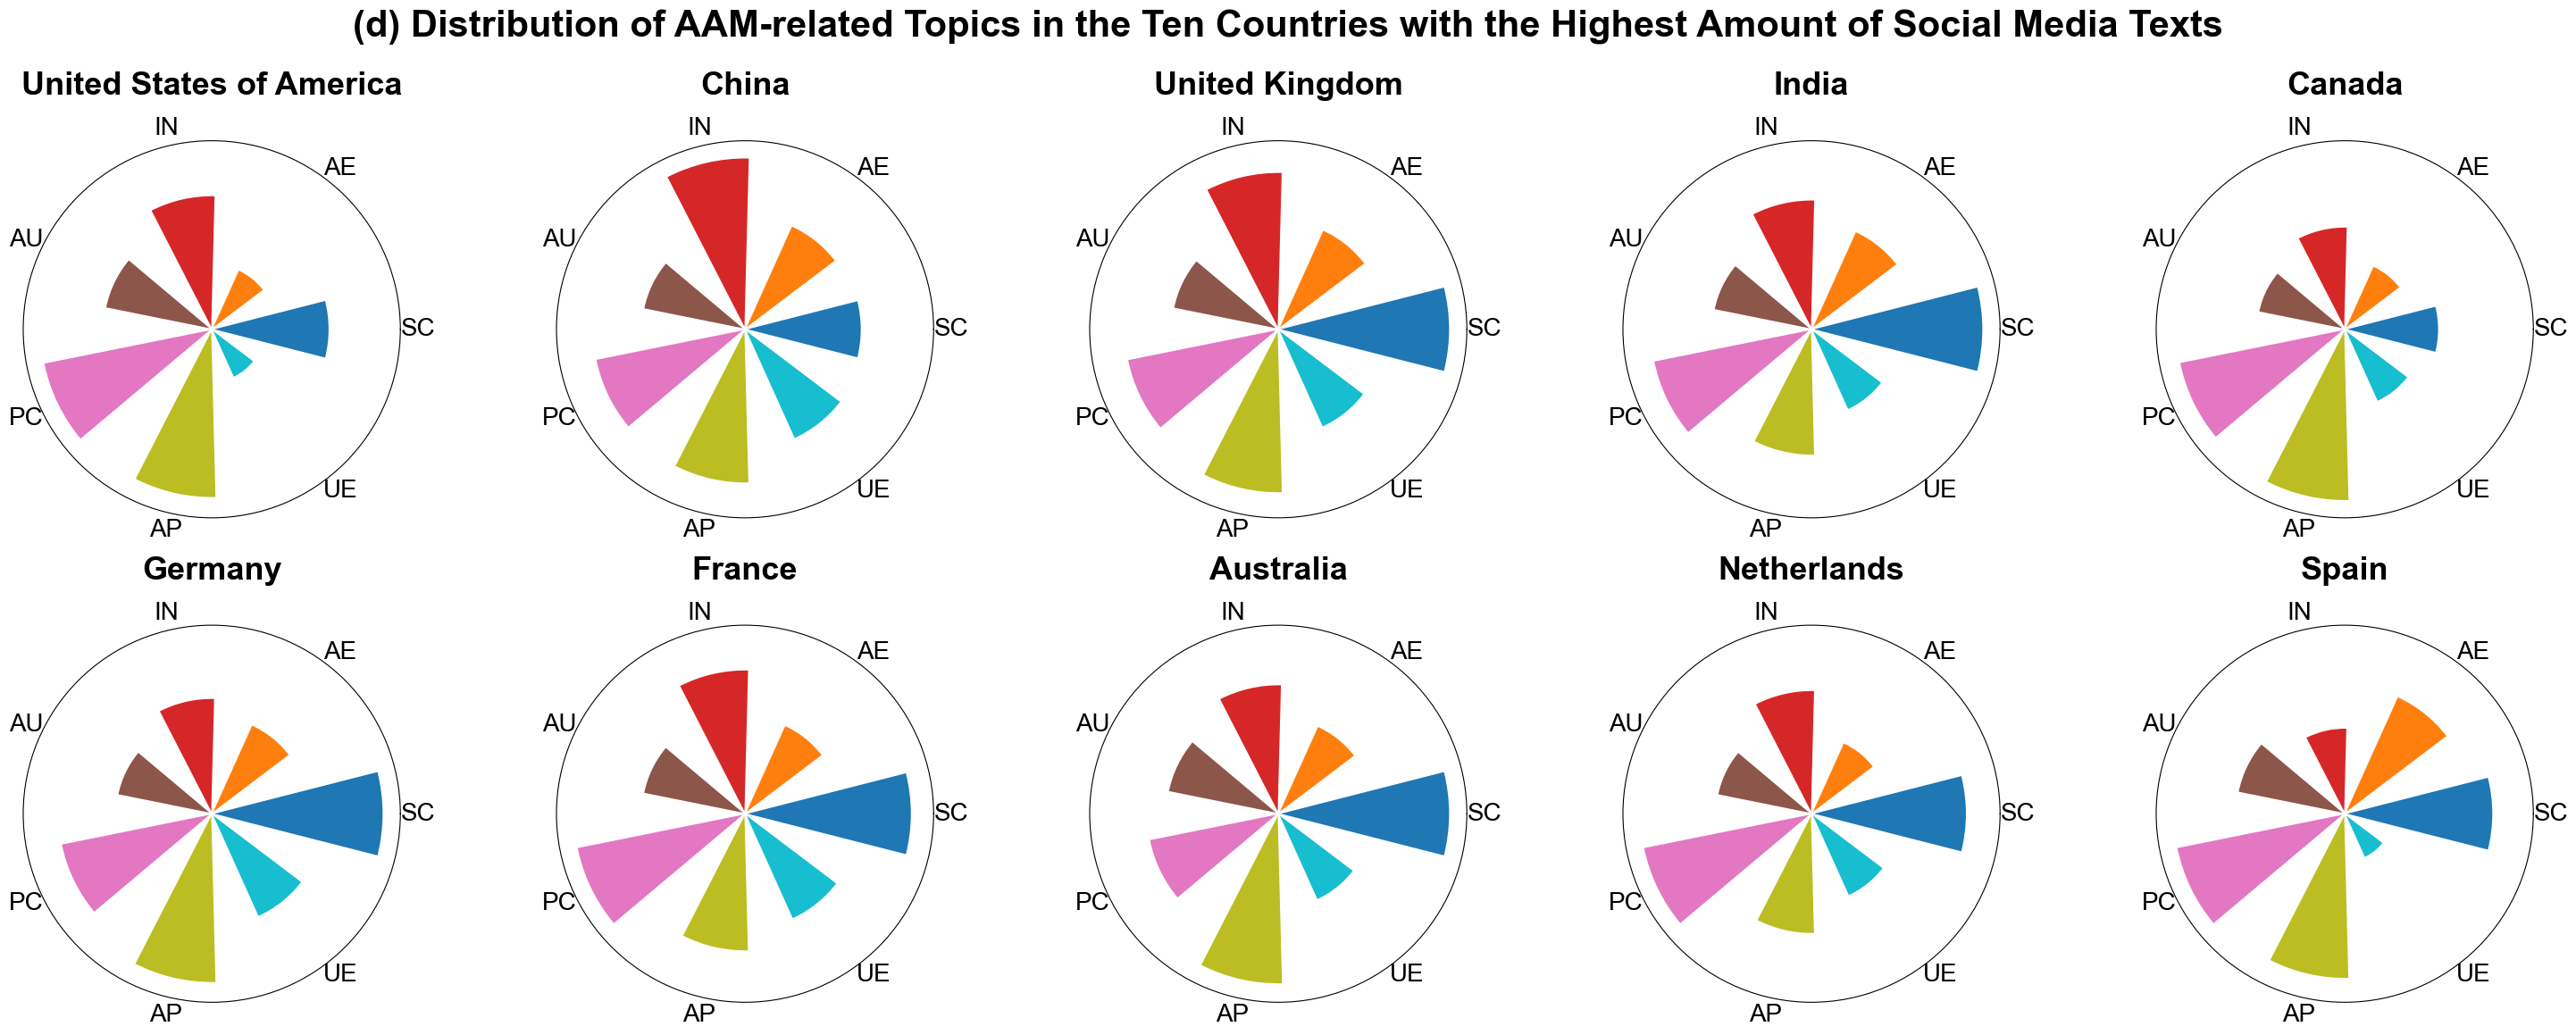

In [14]:
# Figure 3d

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Set the font globally to Arial
plt.rcParams['font.family'] = 'Arial'

# Load the dataset
file_path = r'C:\Users\justi\Downloads\UAM-TM\Fig_3de.csv'

try:
    data = pd.read_csv(file_path)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Convert topic columns to numeric
topic_cols = ['SC', 'AE', 'IN', 'AU', 'PC', 'AP', 'UE']  # Changed to abbreviations
original_topic_cols = [f"Topic {i}" for i in range(1, 8)]  # Keep original names for data access
data[original_topic_cols] = data[original_topic_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows where all topic columns are NaN
data.dropna(subset=original_topic_cols, how="all", inplace=True)

# Ensure 'Year' is in the correct range
data = data[data['Year'].between(2015, 2024)]

# Calculate total text count for each country from 2015 to 2024
total_text_count = data.groupby('Nation')[original_topic_cols].sum().sum(axis=1).sort_values(ascending=False)

# Select top 10 countries
top_10_countries = total_text_count.head(10).index.tolist()

# Filter data for top 10 countries
filtered_data = data[data['Nation'].isin(top_10_countries)]

# Calculate CV for each country, each topic over the years
cv_data = []
for country in top_10_countries:
    country_data = filtered_data[filtered_data['Nation'] == country]
    country_cv = {}
    for i, topic in enumerate(topic_cols):
        topic_data = country_data[f'Topic {i+1}']
        # Replace NaN with 0
        topic_data = topic_data.fillna(0)
        mean = topic_data.mean()
        std = topic_data.std()
        cv = (std / mean) * 100 if mean != 0 else 0
        country_cv[topic] = cv
    cv_data.append(country_cv)

# Define colors for each topic
topic_colors = {
    'SC': '#1f77b4',  # Safety Concerns (SC)
    'AE': '#ff7f0e',  # Aerodynamics (AE)
    'IN': '#d62728',  # Integration and Infrastructure (IN)
    'AU': '#8c564b',  # Automation (AU)
    'PC': '#e377c2',  # Price and Cost (PC)
    'AP': '#bcbd22',  # Air Transport Policy (AP)
    'UE': '#17becf'   # User Experience (UE)
}

# Plotting
fig, axs = plt.subplots(2, 5, figsize=(30, 11), subplot_kw=dict(projection='polar'))
axs = axs.ravel()

for i, country in enumerate(top_10_countries):
    ax = axs[i]
    country_cv = cv_data[i]
    
    # Data for polar histogram
    angles = np.linspace(0, 2 * np.pi, len(topic_cols), endpoint=False)
    stats = [country_cv[topic] for topic in topic_cols]
    
    # Plot
    bars = ax.bar(angles, stats, width=0.5, color=[topic_colors[topic] for topic in topic_cols], edgecolor='white')
    
    # Set the title for the subplot
    ax.set_title(country, fontsize=26, fontweight='bold', pad=18)
    
    # Make the plot circular
    ax.set_xticks(angles)
    ax.set_xticklabels(topic_cols, fontsize=20)  # Changed to use abbreviations
    
    # Remove y-axis numbers
    ax.set_yticklabels([])
    
    # Adjust y-axis
    ax.set_ylim(0, max(stats) * 1.1)
    ax.set_yticks([])
    
    # Turn off the grid
    ax.grid(False)
    
    # Add a legend
    # legend_elements = [Patch(facecolor=topic_colors[topic], edgecolor='black', label=topic) for topic in topic_cols]
    # ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=10)

# Remove any unused subplots
for j in range(len(top_10_countries), len(axs)):
    fig.delaxes(axs[j])

# Adjust layout and add main title
plt.tight_layout()
fig.suptitle("(d) Distribution of AAM-related Topics in the Ten Countries with the Highest Amount of Social Media Texts", fontsize=30, fontweight='bold', y=1.05)

# Save the plot as an image
plt.savefig("Fig_3d.png", dpi=300, bbox_inches="tight")
plt.show()

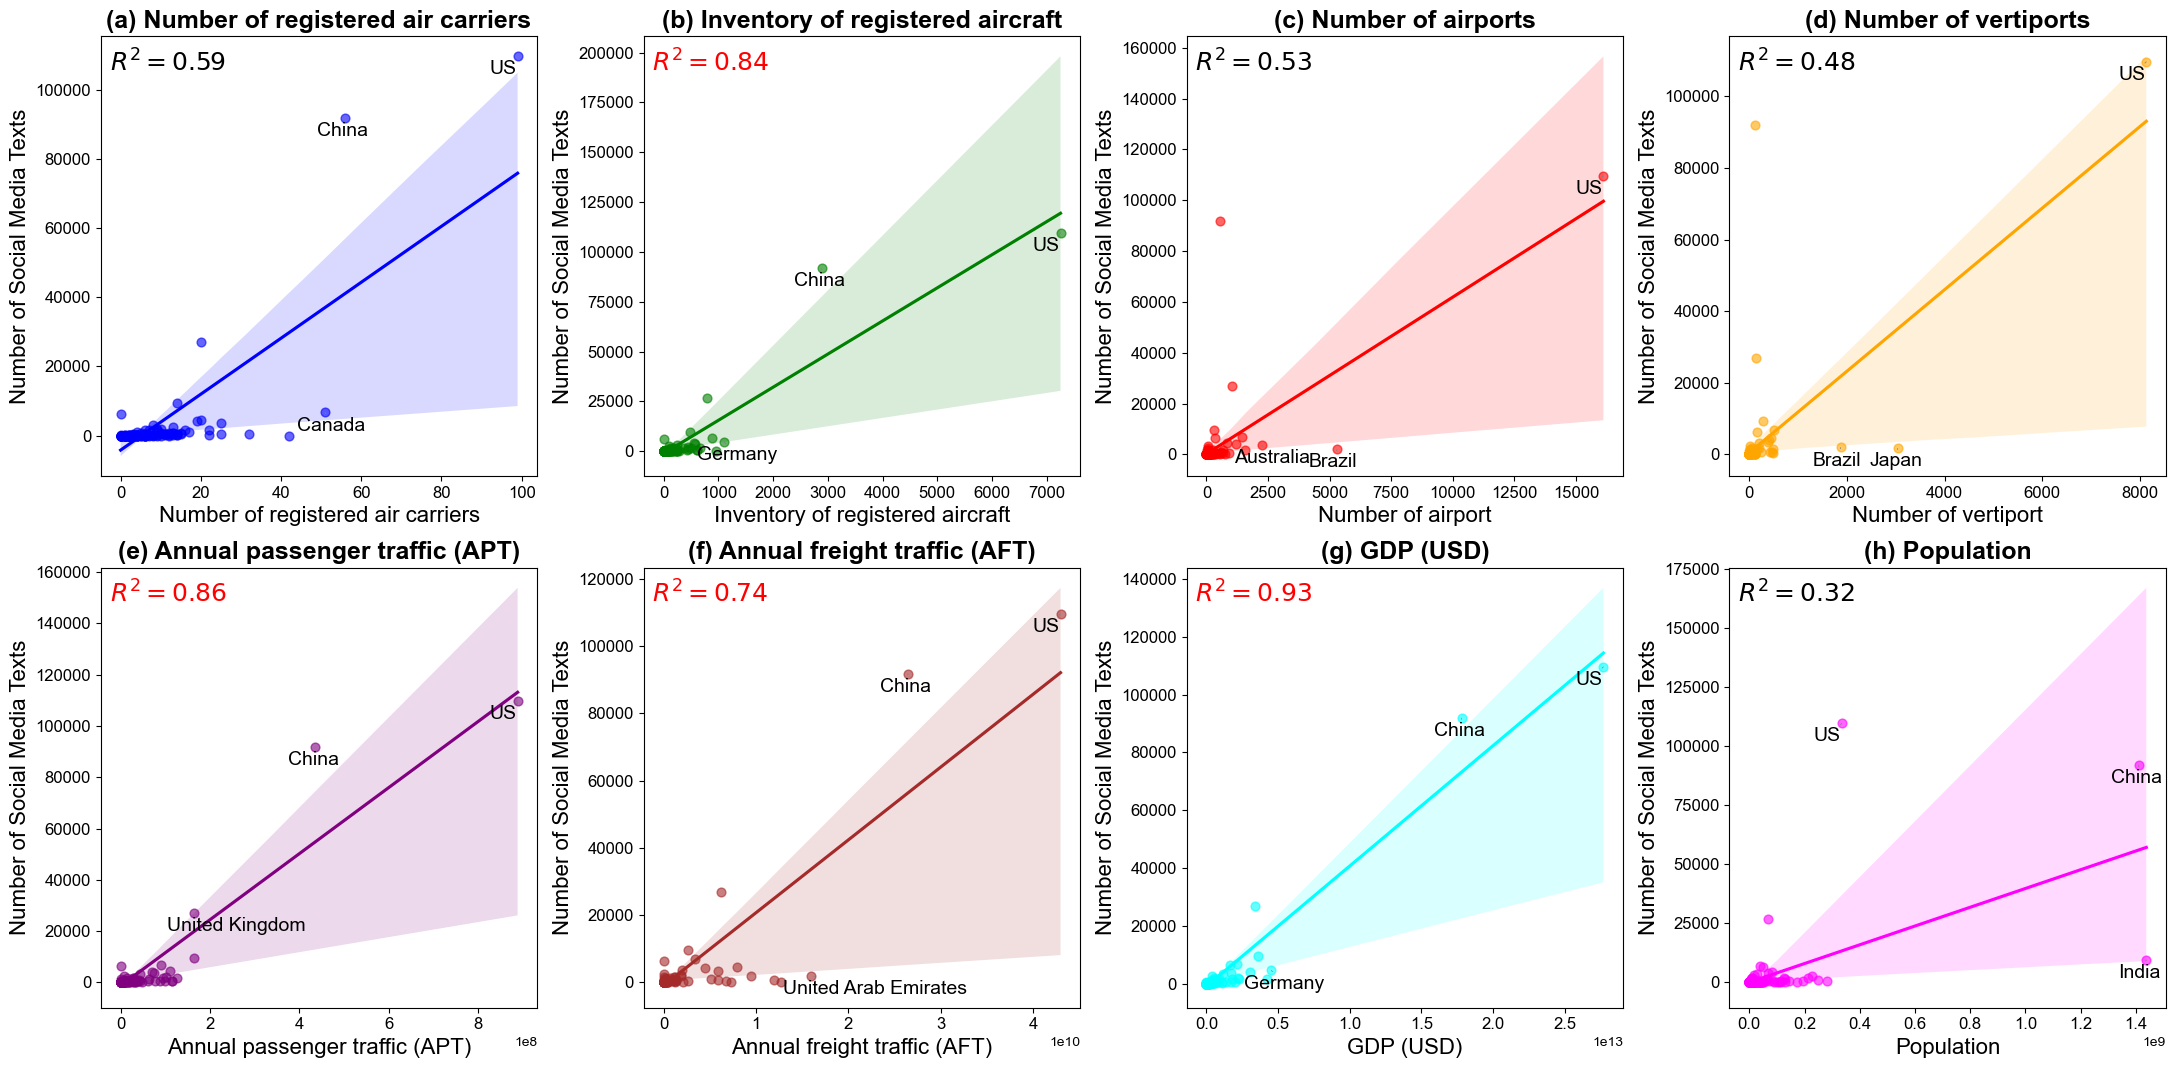

In [15]:
# Fig 4

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
file_path = r'C:\Users\justi\Downloads\UAM-TM\Fig_4.csv'

try:
    data = pd.read_csv(file_path)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

selected_vars = [
    'Number of registered air carriers',
    'Inventory of registered aircraft',
    'Number of airport',
    'Number of vertiport',
    'Annual passenger traffic (APT)',
    'Annual freight traffic (AFT)',
    'GDP (USD)',
    'Population'
]

# Define titles for each subplot in the required format
subplot_titles = [
    "(a) Number of registered air carriers",
    "(b) Inventory of registered aircraft",
    "(c) Number of airports",
    "(d) Number of vertiports",
    "(e) Annual passenger traffic (APT)",
    "(f) Annual freight traffic (AFT)",
    "(g) GDP (USD)",
    "(h) Population"
]

# Remove commas and convert to numeric for all columns
for var in selected_vars:
    if var in data.columns:
        data[var] = data[var].replace(',', '', regex=True)  # Remove commas
        data[var] = pd.to_numeric(data[var], errors='coerce')  # Convert to numeric

# Ensure the dependent variable is also clean and numeric
data['text_study_count'] = pd.to_numeric(data['text_study_count'], errors='coerce')

# Drop rows with missing values after conversion
data = data.dropna(subset=selected_vars + ['text_study_count'])

# Define a list of unique colors for each subplot
colors = [
    'blue', 'green', 'red', 'orange',
    'purple', 'brown', 'cyan', 'magenta'
]

# Create a 2x4 subplot layout
fig, axes = plt.subplots(2, 4, figsize=(22, 11))  # Adjust figure size for readability

# Flatten the axes array to make indexing easier
axes = axes.flatten()

# Loop through each independent variable and create a subplot
for i, (var, color, title) in enumerate(zip(selected_vars, colors, subplot_titles)):
    ax = axes[i]  # Select the current subplot

    # Prepare data for regression
    X = data[[var]].values.reshape(-1, 1)  # Ensure X is 2D
    y = data['text_study_count'].values.reshape(-1, 1)  # Ensure y is also 2D for safety

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # **Correctly compute R² value for each subplot**
    r2 = r2_score(y, y_pred)  # This was missing in the loop before

    # Create a scatterplot with regression line and confidence interval
    sns.regplot(
        x=var,
        y='text_study_count',
        data=data,
        ax=ax,
        scatter_kws={'color': color, 'alpha': 0.6, 's': 40},  # Customize scatter points
        line_kws={'color': color},  # Customize regression line
        ci=95  # Confidence interval (default is 95%)
    )

    # **Fix y-axis limit till 120,000**
  #  ax.set_ylim(0, 120000)  # Set y-axis limit from 0 to 120,000

    # **Increase font size of x-axis and y-axis tick labels**
    ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust tick label size

    # Highlight R² value based on threshold (≥ 0.75)
    if r2 >= 0.70:
        r2_text = f"$R^2 = {r2:.2f}$"
        text_color = 'red'
        fontweight = 'bold'
    else:
        r2_text = f"$R^2 = {r2:.2f}$"
        text_color = 'black'
        fontweight = 'normal'
    
    # Add R² value as text on the plot
    ax.text(
        0.02, 0.92, r2_text, 
        transform=ax.transAxes,  # Position relative to the axis
        fontsize=18, 
        fontname='Arial',  # Use Arial font
        fontweight=fontweight,  # Bold for high R²
        color=text_color,
    )
    
    # Annotate top 3 countries based on the current variable
    top_3 = data.nlargest(3, var)  # Get top 3 rows based on the current variable
    for j, (_, row) in enumerate(top_3.iterrows()):
        font_size = 14 if row['text_study_area'] == 'Australia' else 14  # Adjust font size for "Australia"
        ax.annotate(
            row['text_study_area'],  
            (row[var], row['text_study_count']),
            fontsize=font_size,  
            color='black',
            xytext=(-20, -13),  
            textcoords='offset points',
            arrowprops=dict(arrowstyle="-", color='gray', lw=0.5)  
        )
    
    # Set title and labels with the formatted title
    ax.set_title(title, fontsize=18, fontname='Arial', fontweight='bold')
    ax.set_xlabel(var, fontsize=16, fontname='Arial')
    ax.set_ylabel('Number of Social Media Texts', fontsize=16, fontname='Arial')

# Hide any unused subplots (if there are fewer variables than subplots)
for j in range(len(selected_vars), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent the title from overlapping with the subplots
plt.tight_layout(rect=[0, 0, 1, 0.98])  

# Save the figure as a high-resolution image (optional)
output_path = r'C:\Users\justi\Downloads\UAM-TM\Fig_4.png'
fig.savefig(output_path, dpi=300, bbox_inches='tight')

# Show the plots
plt.show()